# Association between two random variables

In [17]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Importing the housing file for analysis

housing=pd.read_csv('data/housing.csv')

In [4]:
housing.head()

,Unnamed: 0,LSTAT,INDUS,NOX,RM,MEDV
0,0,4.98,2.31,0.538,6.575,24.0
1,1,9.14,7.07,0.469,6.421,21.6
2,2,4.03,7.07,0.469,7.185,34.7
3,3,2.94,2.18,0.458,6.998,33.4
4,4,5.33,2.18,0.458,7.147,36.2


In [5]:
#Using covariance to calculate the association 

housing.cov()

,Unnamed: 0,LSTAT,INDUS,NOX,RM,MEDV
Unnamed: 0,21378.500000,269.868842,400.668663,6.755757,-8.215627,-304.723960
LSTAT,269.868842,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,400.668663,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,6.755757,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-8.215627,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-304.723960,-48.447538,-30.520823,-0.455412,4.493446,84.586724


In [6]:
#Using correlation to find the association between the variables 
housing.corr()

,Unnamed: 0,LSTAT,INDUS,NOX,RM,MEDV
Unnamed: 0,1.000000,0.258465,0.399439,0.398736,-0.079971,-0.226604
LSTAT,0.258465,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.399439,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.398736,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.079971,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.226604,-0.737663,-0.483725,-0.427321,0.695360,1.000000


## Analysis
There is a correlation between the variables either negative or positive. The is a correlaion of 0.6 between INDUS and LSTAT. There is also a positive correlation of 0.7 between NOX and INDUS. 

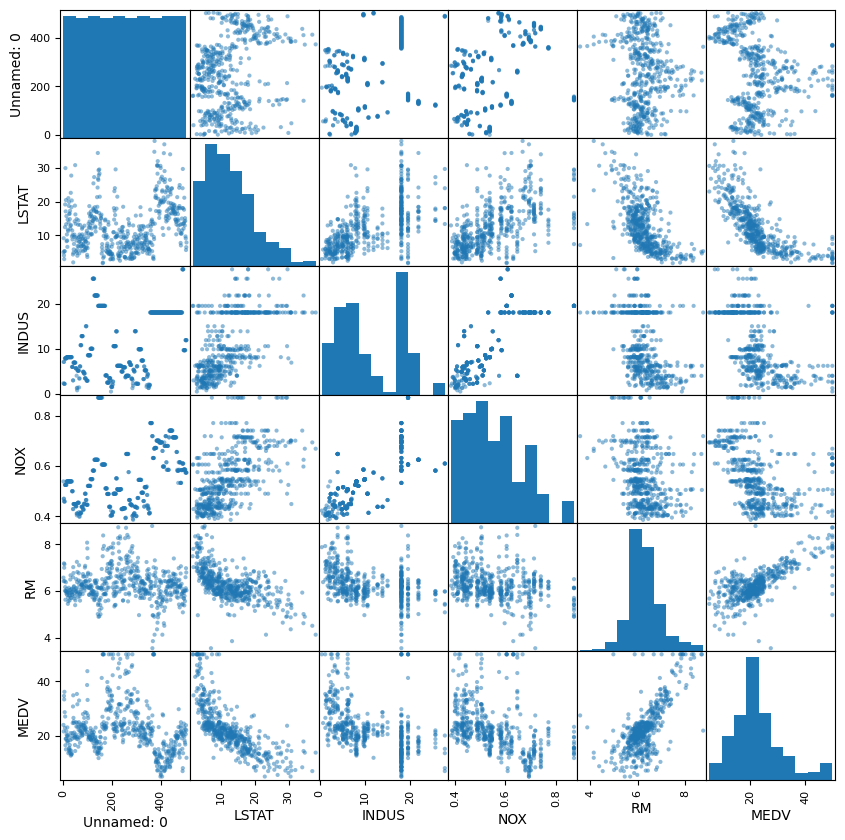

In [7]:
#scatter plot matrix
from pandas.plotting import scatter_matrix
sm = scatter_matrix(housing, figsize=(10, 10))

### Observing the assocation between LSTAT and MEDV

<Axes: xlabel='LSTAT', ylabel='MEDV'>

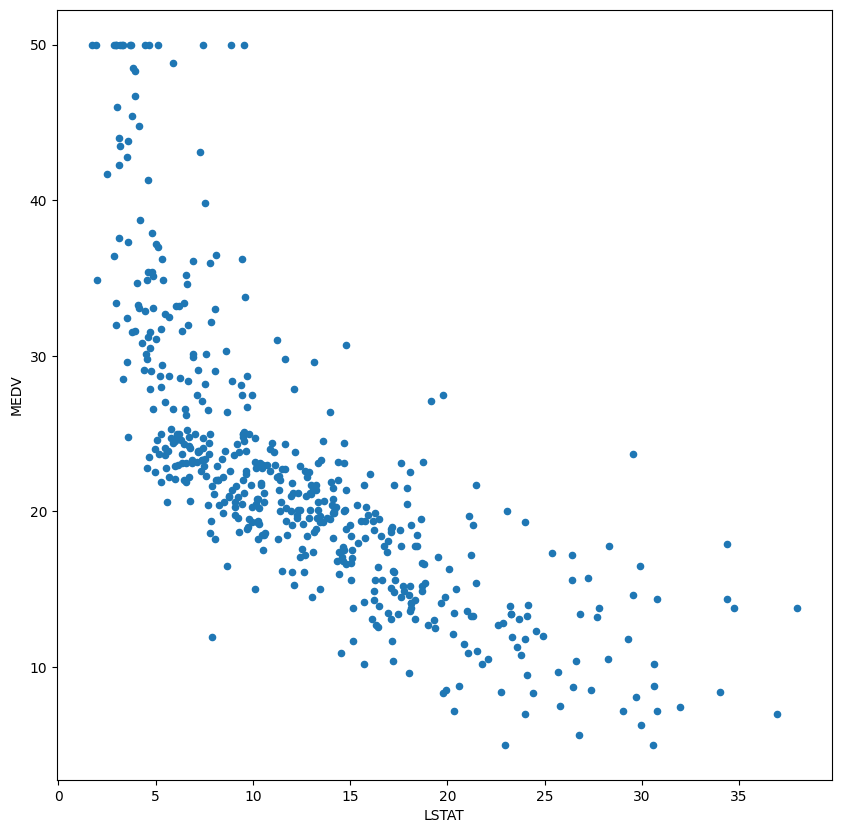

In [8]:
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(10,10))

## Simple Linear Regression

yi=b0+b1*xi+ei

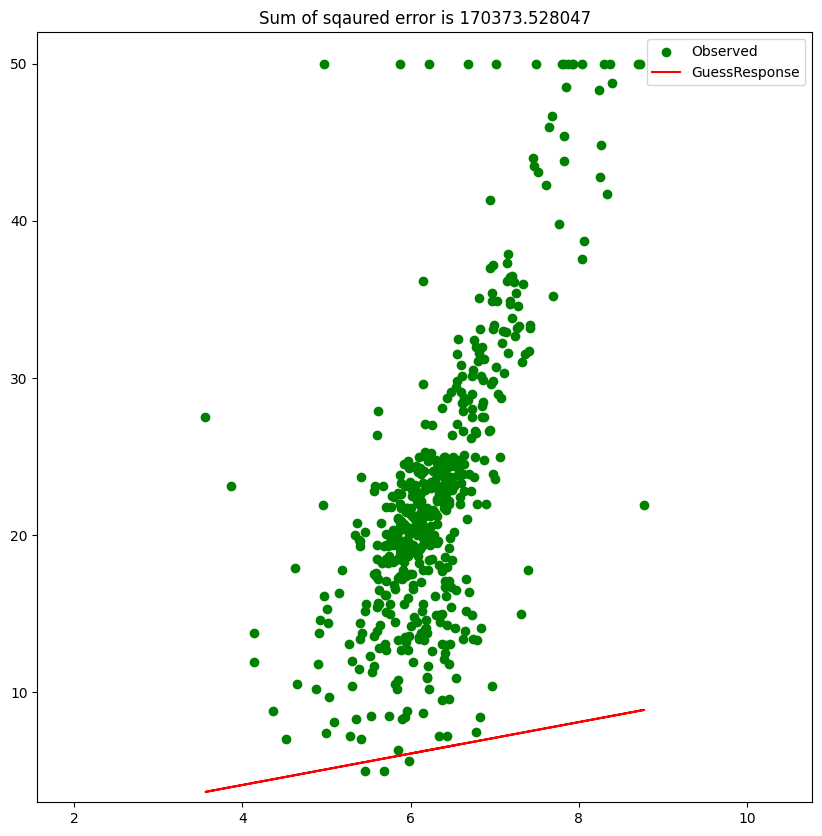

In [9]:
# lets try to guess what are the real values of intercept and slope
# we call our guess b0, b1...
# Try to assign the value of b0, b1 to get a straight line that can describe our data 
b0 = 0.1
b1 = 1
housing['GuessResponse'] = b0 + b1*housing['RM']

# Also want to know the error of of guess...
# This show how far is our guess response from the true response
housing['observederror'] = housing['MEDV'] - housing['GuessResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((((housing['observederror'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

### Least Square Estimates

/tmp/ipykernel_8720/3941267373.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0_ols = model.params[0]
/tmp/ipykernel_8720/3941267373.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1_ols = model.params[1]


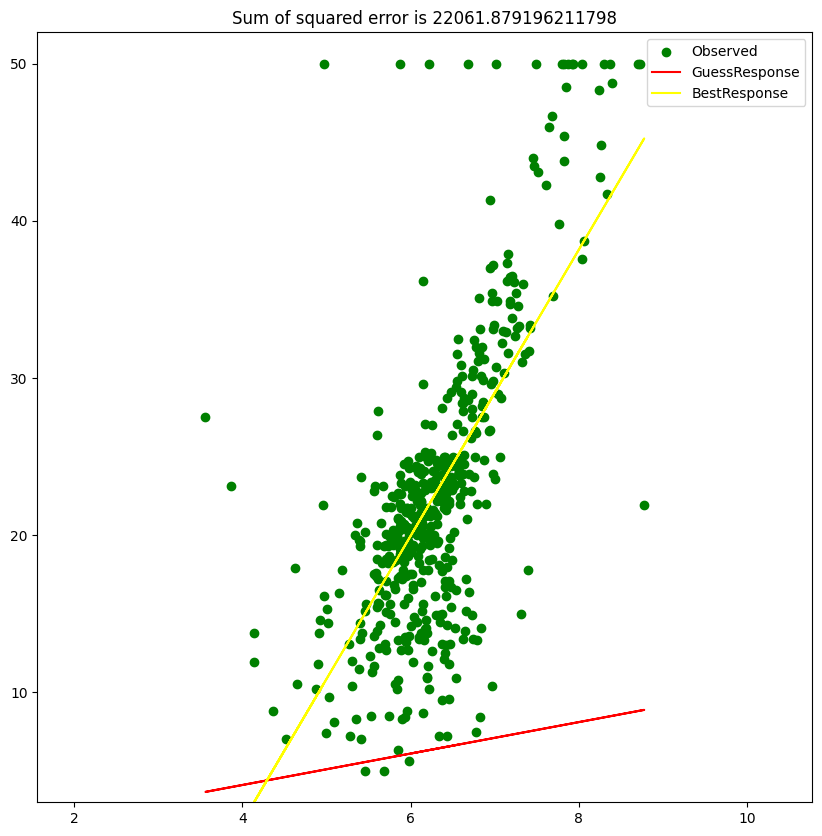

In [10]:
# Input the formula (refer to the lecture video 4.3)
formula = 'MEDV~RM'
model = smf.ols(formula=formula, data=housing).fit()

# Here are estimated intercept and slope by least square estimation
# Attribute 'params' returns a list of estimated parameters form model
b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols*housing['RM']

# Also want to know the error of of guess...
housing['error'] = housing['MEDV'] - housing['BestResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
# See if the error drops after you use least square method
plt.title('Sum of squared error is {}'.format((((housing['error'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.plot(housing['RM'], housing['BestResponse'], color='yellow', label='BestResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

### Summary Table

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           2.49e-74
Time:                        15:27:33   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary table above, r squared is 0.484. This means that 48.4% of the variations of MEDV can be explained by our model. 

### assumptions behind linear regression model 
1. Linearity
2. Independence
3. Normality
4. Equal variance

# Linearity

<Axes: xlabel='LSTAT', ylabel='MEDV'>

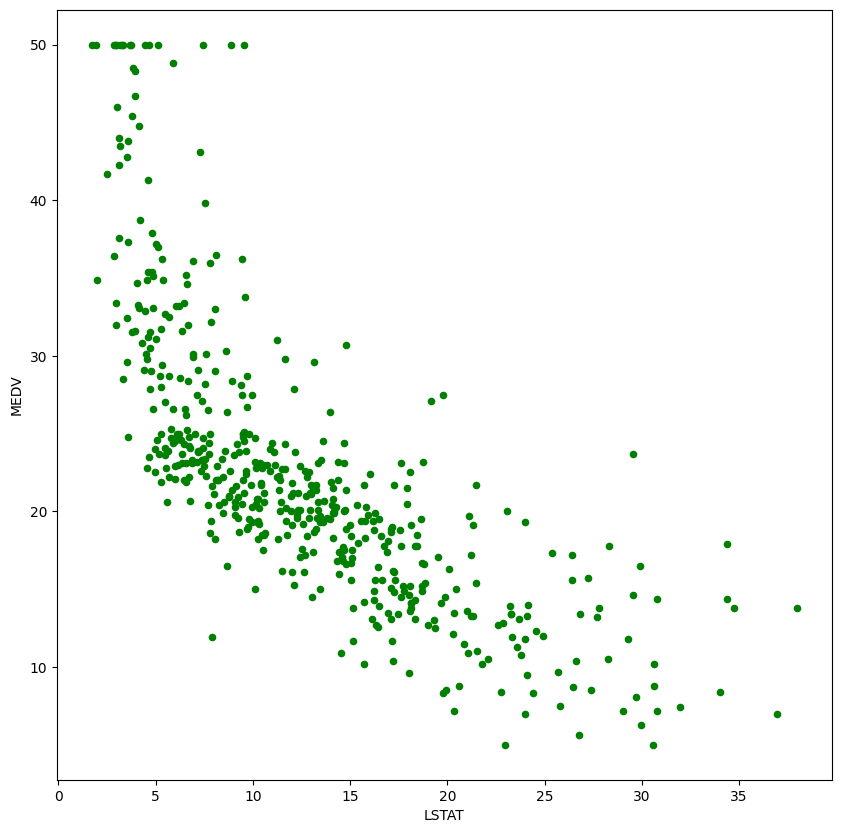

In [13]:
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(10,10), color='g')

#### Independence

In [14]:
# Get all errors (residuals)
housing['error'] = housing['MEDV'] - housing['BestResponse']

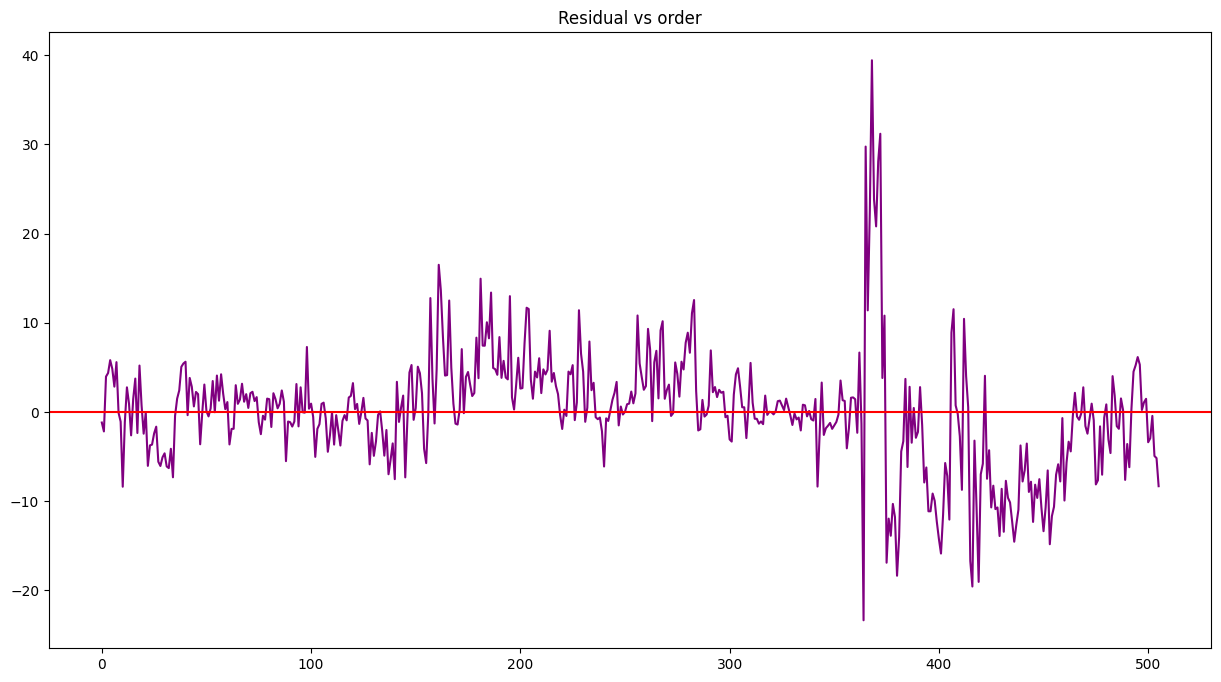

In [15]:
#Method 1: Residual vs order plot
#error vs order plot (Residual vs order) as a fast check
plt.figure(figsize=(15, 8))
plt.title('Residual vs order')
plt.plot(housing.index, housing['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

In [16]:
#Method2: Durbin Watson Test
#Rule of thunb: test statistic value in the range of 1.5 to 2.5 are relatively normal
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           2.49e-74
Time:                        15:33:53   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Normality

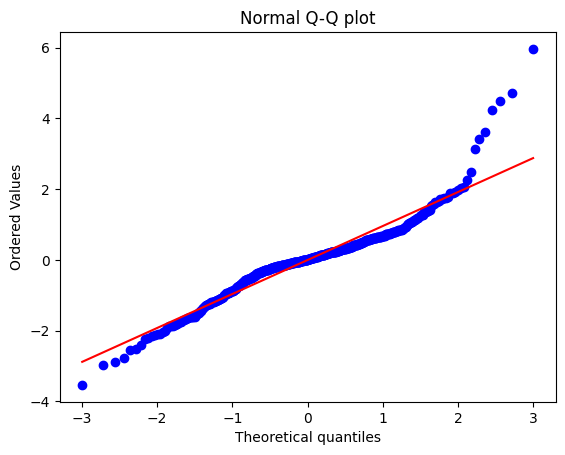

In [18]:
z = (housing['error'] - housing['error'].mean())/housing['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

#### Equal Variance

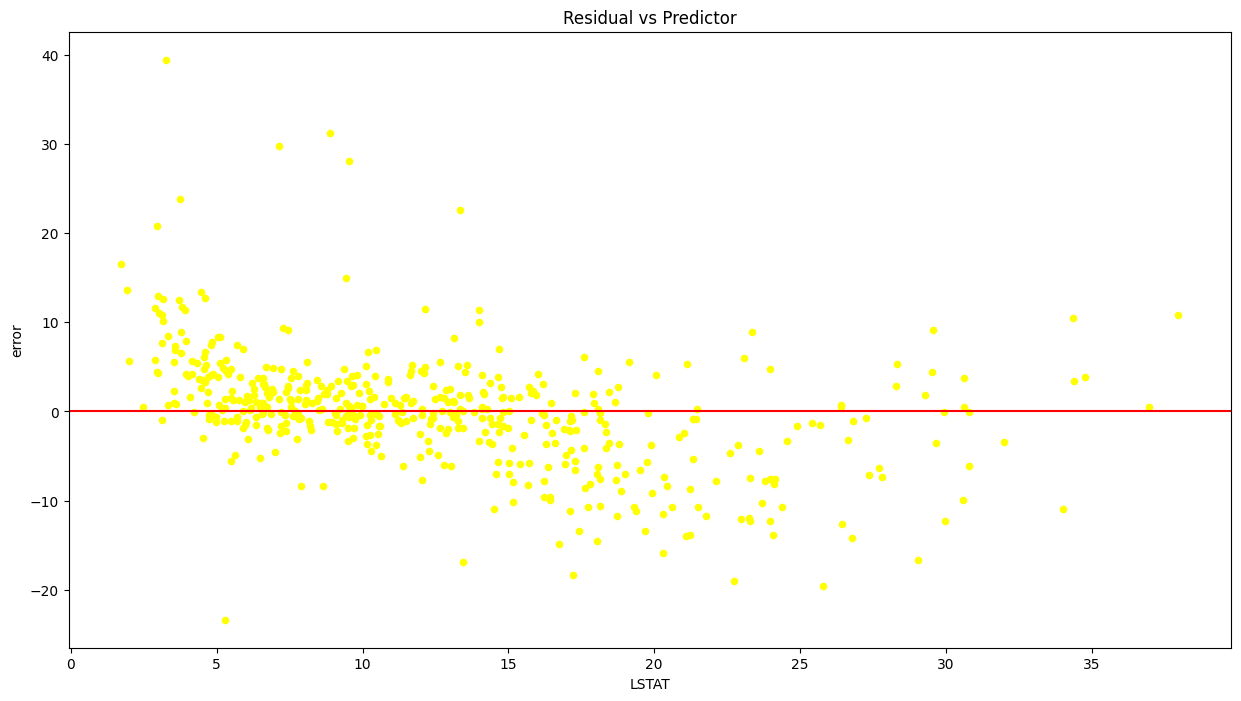

In [22]:
#Residual vs predictor plot
housing.plot(kind='scatter', x='LSTAT', y='error', figsize=(15, 8), color='yellow')
plt.title('Residual vs Predictor')
plt.axhline(y=0, color='red')
plt.show()

From the analysis we can see that the regression model (MEDV~LSTAT) violates all the four assumptions. Thus, we cannot make statistical inference using this model. 